# Python Lab

## Submitted by:
## Piu Mallick | Email id: pim16@pitt.edu | ID: 4374215
## Debdas Ghosh | Email id: deg107@pitt.edu | ID: 4366821

In [1]:
# Getting working directory
import os
import math
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,10)})
os.getcwd()

/Users/piumallick/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'/Users/piumallick/Documents/2ndSemester/INFSCI2160-DataMining/Python Lab Latest'

In [2]:
# Ignore warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
from sklearn import preprocessing

In [4]:
# Loading the dataset
df = pd.read_csv('PYTHON_LAB_TRAIN.csv')

In [5]:
# Checking sample data
df.head()

SCHED_SURG_AREA   RACE            ETHNIC_GROUP        PROC_DATE  \
0           ALTOR  White  Not Hispanic or Latino   2/19/2018 0:00   
1           NOROB  White  Not Hispanic or Latino   2/22/2018 0:00   
2           SHYOR  White                Declined   3/27/2018 0:00   
3           SHYOR  White  Not Hispanic or Latino    6/8/2017 0:00   
4           EASOR  White  Not Hispanic or Latino  12/20/2017 0:00   

  SCHED_HOSPITAL     CREATE_DT_TM SCHED_START_DT_TM  SCHED_SURG_PROC_CD  \
0            ALT  2/13/2018 20:04    2/19/2018 7:00             3904785   
1            NOR   1/23/2018 9:27    2/22/2018 8:00           576089753   
2            SHY   3/6/2018 11:02    3/27/2018 7:15             3907499   
3            SHY   6/6/2017 14:19    6/8/2017 13:00             3907039   
4            EAS  12/7/2017 13:52  12/20/2017 10:00             3907499   

   FEMALE  AGE_ON_CONTACT_DATE    BMI  WEIGHT  BP_SYSTOLIC  BP_DIASTOLIC  \
0     0.0                 73.3  28.21  3056.0        102.0          70.0   
1     1.0                 26.1  25.61  2240.0         96.0          58.0   
2     1.0                 19.0  37.76  3520.0          NaN           NaN   
3     0.0                 74.1  29.53  3200.0          NaN           NaN   
4     0.0                 57.8  26.91  3398.4        120.0          60.0   

   PULSE  PCPVISIT  METFORMIN_FLAG  OPIOIDS_FLAG  ALPHA_BLOCKERS  \
0   83.0       0.0             0.0           1.0             0.0   
1    NaN       0.0             0.0           0.0             0.0   
2    NaN       0.0             0.0           1.0             0.0   
3    NaN       0.0             0.0           1.0             0.0   
4    NaN       1.0             0.0           0.0             0.0   

   CENTRAL_ANTAGONISTS  RENIN  BETA_BLOCKERS  ACE_INHIB  ARB  \
0                  0.0    0.0            0.0        0.0  0.0   
1                  0.0    0.0            0.0        0.0  0.0   
2                  0.0    0.0            0.0        0.0  0.0   
3                  0.0    0.0            1.0        0.0  1.0   
4                  0.0    0.0            0.0        0.0  0.0   

   ALDOSTERONE_BLOCKERS  VASODIALATORS  DIURETICS  CALCIUM_BLOCKERS  STATINS  \
0                   0.0            0.0        0.0               1.0      1.0   
1                   0.0            0.0        0.0               0.0      0.0   
2                   0.0            0.0        0.0               0.0      0.0   
3                   0.0            0.0        1.0               1.0      1.0   
4                   0.0            0.0        0.0               0.0      1.0   

   INSULIN_MEDS  ASPIRIN  WARFARIN  DOACS  PRETERM_17P  MEDROL  PREDNISONE  \
0           0.0      1.0       1.0    0.0          0.0     0.0         1.0   
1           0.0      0.0       0.0    0.0          0.0     0.0         0.0   
2           0.0      0.0       0.0    0.0          0.0     0.0         0.0   
3           0.0      1.0       0.0    0.0          0.0     0.0         0.0   
4           0.0      0.0       0.0    0.0          0.0     0.0         0.0   

   INHALED_STEROID_WITH_LABA  INHALED_STEROID_WITHOUT_LABA  INHALED_STEROIDS  \
0                        0.0                           0.0               0.0   
1                        0.0                           0.0               0.0   
2                        0.0                           0.0               0.0   
3                        0.0                           0.0               0.0   
4                        0.0                           0.0               0.0   

   ASTHMA_BIOLOGICS  SHORT_ACTING_BRONCHO_DIALATORS  TNF_INHIBITORS  \
0               0.0                             0.0             0.0   
1               0.0                             0.0             0.0   
2               0.0                             0.0             0.0   
3               0.0                             0.0             0.0   
4               0.0                             0.0             0.0   

   IMMUNOMODULATORS  AMINOS

In [6]:
# Checking the statistics of the numerical variables in the dataset
df.describe()

SCHED_SURG_PROC_CD        FEMALE  AGE_ON_CONTACT_DATE           BMI  \
count        8.000000e+04  69813.000000         69813.000000  60741.000000   
mean         1.267181e+08      0.581969            58.550577     30.432342   
std          4.004017e+08      0.493239            18.155244      7.674459   
min          3.903406e+06      0.000000             0.200000     10.630000   
25%          3.904778e+06      0.000000            46.400000     25.090000   
50%          3.907224e+06      1.000000            61.300000     29.260000   
75%          5.924212e+07      1.000000            71.700000     34.500000   
max          3.693088e+09      1.000000           104.700000     89.860000   

             WEIGHT   BP_SYSTOLIC  BP_DIASTOLIC         PULSE      PCPVISIT  \
count  61030.000000  58853.000000  58797.000000  45272.000000  69813.000000   
mean    3039.820547    128.384178     76.327466     78.685965      0.216435   
std      854.929967     18.050635     10.962220     14.608239      0.411817   
min      174.960000     48.000000      2.000000      0.000000      0.000000   
25%     2448.000000    118.000000     70.000000     68.000000      0.000000   
50%     2936.000000    126.000000     78.000000     77.000000      0.000000   
75%     3520.000000    139.000000     82.000000     87.000000      0.000000   
max    22736.000000    249.000000    159.000000    195.000000      1.000000   

       METFORMIN_FLAG  OPIOIDS_FLAG  ALPHA_BLOCKERS  CENTRAL_ANTAGONISTS  \
count    69813.000000  69813.000000    69813.000000         69813.000000   
mean         0.116726      0.327274        0.016358             0.000587   
std          0.321096      0.469222        0.126849             0.024227   
min          0.000000      0.000000        0.000000             0.000000   
25%          0.000000      0.000000        0.000000             0.000000   
50%          0.000000      0.000000        0.000000             0.000000   
75%          0.000000      1.000000        0.000000             0.000000   
max          1.000000      1.000000        1.000000             1.000000   

              RENIN  BETA_BLOCKERS     ACE_INHIB           ARB  \
count  69813.000000   69813.000000  69813.000000  69813.000000   
mean       0.000387       0.295819      0.210964      0.123186   
std        0.019662       0.456413      0.407996      0.328653   
min        0.000000       0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000   
75%        0.000000       1.000000      0.000000      0.000000   
max        1.000000       1.000000      1.000000      1.000000   

       ALDOSTERONE_BLOCKERS  VASODIALATORS     DIURETICS  CALCIUM_BLOCKERS  \
count          69813.000000   69813.000000  69813.000000      69813.000000   
mean               0.030453       0.019796      0.262888          0.190423   
std                0.171831       0.139299      0.440205          0.392638   
min                0.000000       0.000000      0.000000          0.000000   
25%                0.000000       0.000000      0.000000          0.000000   
50%                0.000000       0.000000      0.000000          0.000000   
75%                0.000000       0.000000      1.000000          0.000000   
max                1.000000       1.000000      1.000000          1.000000   

            STATINS  INSULIN_MEDS       ASPIRIN      WARFARIN         DOACS  \
count  69813.000000  69813.000000  69813.000000  69813.000000  69813.000000   
mean       0.366694      0.105339      0.337430      0.057425      0.056694   
std        0.481905      0.306991      0.472836      0.232654      0.231259   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      1.000000      0.0

In [7]:
# Checking various columns of the dataset
df.columns

Index(['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'PROC_DATE',
       'SCHED_HOSPITAL', 'CREATE_DT_TM', 'SCHED_START_DT_TM',
       'SCHED_SURG_PROC_CD', 'FEMALE', 'AGE_ON_CONTACT_DATE',
       ...
       'BACTERIA_MAX_1', 'BACTERIA_MIN_1', 'EPITHELIAL_CELLS_MAX_1',
       'EPITHELIAL_CELLS_MIN_1', 'AG_RATIO_MAX_1', 'AG_RATIO_MIN_1',
       'PCO2_ARTERIAL_MAX_1', 'PCO2_ARTERIAL_MIN_1', 'ADI_2015', 'LOS'],
      dtype='object', length=292)

In [8]:
# Checking the datatypes of the columns
df.dtypes

SCHED_SURG_AREA                      object
RACE                                 object
ETHNIC_GROUP                         object
PROC_DATE                            object
SCHED_HOSPITAL                       object
CREATE_DT_TM                         object
SCHED_START_DT_TM                    object
SCHED_SURG_PROC_CD                    int64
FEMALE                              float64
AGE_ON_CONTACT_DATE                 float64
BMI                                 float64
WEIGHT                              float64
BP_SYSTOLIC                         float64
BP_DIASTOLIC                        float64
PULSE                               float64
PCPVISIT                            float64
METFORMIN_FLAG                      float64
OPIOIDS_FLAG                        float64
ALPHA_BLOCKERS                      float64
CENTRAL_ANTAGONISTS                 float64
RENIN                               float64
BETA_BLOCKERS                       float64
ACE_INHIB                       

In [9]:
# Making a copy of the dataset
train_df = df.copy()

In [10]:
# Importing LabelEncoder (for transforming non-numerical variables to numeric variables)
le = preprocessing.LabelEncoder()

In [11]:
# Label Encoding SCHED_SURG_AREA
le.fit(train_df['SCHED_SURG_AREA'])
train_df['SCHED_SURG_AREA'] = le.transform(train_df['SCHED_SURG_AREA'])

In [12]:
# Label Encoding RACE
train_df['RACE'] = le.fit_transform(train_df['RACE'].apply(str))

In [13]:
# Label Encoding ETHNIC_GROUP
train_df['ETHNIC_GROUP'] = le.fit_transform(train_df['ETHNIC_GROUP'].apply(str))

In [14]:
# Label Encoding SCHED_HOSPITAL
train_df['SCHED_HOSPITAL'] = le.fit_transform(train_df['SCHED_HOSPITAL'].apply(str))

In [15]:
# Label Encoding SCHED_SURG_PROC_CD
train_df['SCHED_SURG_PROC_CD'] = le.fit_transform(train_df['SCHED_SURG_PROC_CD'].apply(str))

In [16]:
# Label Encoding FEMALE
train_df['FEMALE'] = le.fit_transform(train_df['FEMALE'].apply(str))

In [17]:
# Label Encoding CAV_REC_SEX
train_df['CAV_REC_SEX'] = le.fit_transform(train_df['CAV_REC_SEX'].apply(str))

In [18]:
# Label Encoding CAV_REC_LANG
train_df['CAV_REC_LANG'] = le.fit_transform(train_df['CAV_REC_LANG'].apply(str))

In [19]:
# Label Encoding CAV_REC_IPOP
train_df['CAV_REC_IPOP'] = le.fit_transform(train_df['CAV_REC_IPOP'].apply(str))

In [20]:
# Label Encoding CAV_REC_PRIORITY_CODE
train_df['CAV_REC_PRIORITY_CODE'] = le.fit_transform(train_df['CAV_REC_PRIORITY_CODE'].apply(str))

In [21]:
# Label Encoding CAV_REC_DISP_CODE
train_df['CAV_REC_DISP_CODE'] = le.fit_transform(train_df['CAV_REC_DISP_CODE'].apply(str))

In [22]:
# Label Encoding LOS_Binary
train_df['LOS_Binary'] = train_df.apply(lambda x: 1 if (x['LOS'] > 5) else 0,axis=1)

In [23]:
# Checking sample values (after Label Encoding)
train_df.head()

SCHED_SURG_AREA  RACE  ETHNIC_GROUP        PROC_DATE  SCHED_HOSPITAL  \
0                2    16             2   2/19/2018 0:00               0   
1               28    16             2   2/22/2018 0:00              12   
2               40    16             0   3/27/2018 0:00              16   
3               40    16             2    6/8/2017 0:00              16   
4                9    16             2  12/20/2017 0:00               3   

      CREATE_DT_TM SCHED_START_DT_TM  SCHED_SURG_PROC_CD  FEMALE  \
0  2/13/2018 20:04    2/19/2018 7:00                 640       0   
1   1/23/2018 9:27    2/22/2018 8:00                1314       1   
2   3/6/2018 11:02    3/27/2018 7:15                1097       1   
3   6/6/2017 14:19    6/8/2017 13:00                 980       0   
4  12/7/2017 13:52  12/20/2017 10:00                1097       0   

   AGE_ON_CONTACT_DATE    BMI  WEIGHT  BP_SYSTOLIC  BP_DIASTOLIC  PULSE  \
0                 73.3  28.21  3056.0        102.0          70.0   83.0   
1                 26.1  25.61  2240.0         96.0          58.0    NaN   
2                 19.0  37.76  3520.0          NaN           NaN    NaN   
3                 74.1  29.53  3200.0          NaN           NaN    NaN   
4                 57.8  26.91  3398.4        120.0          60.0    NaN   

   PCPVISIT  METFORMIN_FLAG  OPIOIDS_FLAG  ALPHA_BLOCKERS  \
0       0.0             0.0           1.0             0.0   
1       0.0             0.0           0.0             0.0   
2       0.0             0.0           1.0             0.0   
3       0.0             0.0           1.0             0.0   
4       1.0             0.0           0.0             0.0   

   CENTRAL_ANTAGONISTS  RENIN  BETA_BLOCKERS  ACE_INHIB  ARB  \
0                  0.0    0.0            0.0        0.0  0.0   
1                  0.0    0.0            0.0        0.0  0.0   
2                  0.0    0.0            0.0        0.0  0.0   
3                  0.0    0.0            1.0        0.0  1.0   
4                  0.0    0.0            0.0        0.0  0.0   

   ALDOSTERONE_BLOCKERS  VASODIALATORS  DIURETICS  CALCIUM_BLOCKERS  STATINS  \
0                   0.0            0.0        0.0               1.0      1.0   
1                   0.0            0.0        0.0               0.0      0.0   
2                   0.0            0.0        0.0               0.0      0.0   
3                   0.0            0.0        1.0               1.0      1.0   
4                   0.0            0.0        0.0               0.0      1.0   

   INSULIN_MEDS  ASPIRIN  WARFARIN  DOACS  PRETERM_17P  MEDROL  PREDNISONE  \
0           0.0      1.0       1.0    0.0          0.0     0.0         1.0   
1           0.0      0.0       0.0    0.0          0.0     0.0         0.0   
2           0.0      0.0       0.0    0.0          0.0     0.0         0.0   
3           0.0      1.0       0.0    0.0          0.0     0.0         0.0   
4           0.0      0.0       0.0    0.0          0.0     0.0         0.0   

   INHALED_STEROID_WITH_LABA  INHALED_STEROID_WITHOUT_LABA  INHALED_STEROIDS  \
0                        0.0                           0.0               0.0   
1                        0.0                           0.0               0.0   
2                        0.0                           0.0               0.0   
3                        0.0                           0.0               0.0   
4                        0.0                           0.0               0.0   

   ASTHMA_BIOLOGICS  SHORT_ACTING_BRONCHO_DIALATORS  TNF_INHIBITORS  \
0               0.0                             0.0             0.0   
1               0.0                             0.0             0.0   
2               0.0                             0.0             0.0   
3               0.0                             0.0             0.0   
4               0.0                             0.0             0.0   

   IMMUNOMODULATORS  AMINOSALICYLATES  CORTICOSTEROIDS  ARNI  ALLOPURINOL  \
0    

In [25]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df.drop(columns = ['LOS', 'LOS_Binary', 'PROC_DATE', 'CREATE_DT_TM', 'SCHED_START_DT_TM']), 
                                                    train_df['LOS_Binary'], 
                                                    test_size=0.2, 
                                                    random_state=1)
# Again, splitting into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

### Choosing the 1st model:

### 1. CatBoost Model

In [26]:
x_train_cat = x_train.copy()
x_train_cat[['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'SCHED_SURG_PROC_CD', 'FEMALE', 'PCPVISIT', 'METFORMIN_FLAG', 'OPIOIDS_FLAG', 'ALPHA_BLOCKERS', 'CENTRAL_ANTAGONISTS', 'RENIN', 'BETA_BLOCKERS', 'ACE_INHIB', 'ARB', 'ALDOSTERONE_BLOCKERS', 'VASODIALATORS', 'DIURETICS', 'CALCIUM_BLOCKERS', 'STATINS', 'INSULIN_MEDS', 'ASPIRIN', 'WARFARIN', 'DOACS', 'PRETERM_17P', 'MEDROL', 'PREDNISONE', 'INHALED_STEROID_WITH_LABA', 'INHALED_STEROID_WITHOUT_LABA', 'INHALED_STEROIDS', 'ASTHMA_BIOLOGICS', 'SHORT_ACTING_BRONCHO_DIALATORS', 'TNF_INHIBITORS', 'IMMUNOMODULATORS', 'AMINOSALICYLATES', 'CORTICOSTEROIDS', 'ARNI', 'ALLOPURINOL', 'SEIZURE', 'MUSCLERELAXANT', 'DIGOXIN', 'INOTROPES', 'ANTI_ARRHYTHMIC', 'ANTIPLATELET', 'SULFONYLUREA', 'GLP_1_AGONIST', 'THIAZOLIDINEDIONE', 'SGLT2_INHIBITOR', 'DPP4_INHIBITOR', 'ALPHA_GLUCOSIDASE_INHIBITOR', 'AMYLINOMIMETIC', 'RAPID_ACTING_INSULIN', 'SHORT_ACTING_INSULIN', 'INTERMEDIATE_ACTING_INSULIN', 'LONG_ACTING_INSULIN', 'MINOCYCLINE', 'DOXYCYCLINE', 'MELATONIN', 'METHAZOLAMIDE', 'HYDROXYCHLOROQUINE', 'ITTC', 'DMARDS', 'OBESE_HST', 'MORBIDOBESE_HST', 'PH_HST', 'AFIB_HST', 'COPD_HST', 'CHF_HST', 'DIAB_HST', 'CAD_HST', 'OSTEO_HST', 'HTN_HST', 'CANCER_HST', 'LUNG_CANCER_HST', 'OVARIAN_CANCER_HST', 'HEAD_NECK_CANCER_HST', 'BREAST_CANCER_HST', 'ASTHMA_HST', 'GERD_HST', 'FIBROMYALGIA_HST', 'DEPRESSION_HST', 'PSORIATIC_ARTHRITIS_HST', 'RHEUM_ARTHRITIS_HST', 'LUPUS_HST', 'VTVF_HST', 'STROKE_HST', 'VASCULARDISEASE_HST', 'LOWBACKPAIN_HST', 'DVT_HST', 'PE_HST', 'HYPOTHYROIDISM_HST', 'ADRENAL_INSUFFICIENCY_HST', 'INFERTILITY_HST', 'CKD_HST', 'ESRD_HST', 'OBS_SLEEPAPNEA_HST', 'CARDIAC_ARREST_HST', 'HEMO_STROKE_HST', 'MAJOR_BLEED_HST', 'MACULAR_DEGEN_HST', 'ANXIETY_HST', 'HYPERLIPIDEMIA_HST', 'HIV_HST', 'ALZHEIMER_HST', 'COLORECTAL_CANCER_HST', 'ENDOMETRIAL_CANCER_HST', 'GLAUCOMA_HST', 'HIP_PELVIC_FRACTURE_HST', 'BENIGN_PROSTATIC_HYPERPLASIA_HST', 'CIRRHOSIS_HST', 'CIRRHOSIS_HST_1', 'CAV_REC_SEX', 'CAV_REC_LANG', 'CAV_REC_IPOP', 'CAV_REC_PRIORITY_CODE', 'CAV_REC_DISP_CODE']] = x_train_cat[['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'SCHED_SURG_PROC_CD', 'FEMALE', 'PCPVISIT', 'METFORMIN_FLAG', 'OPIOIDS_FLAG', 'ALPHA_BLOCKERS', 'CENTRAL_ANTAGONISTS', 'RENIN', 'BETA_BLOCKERS', 'ACE_INHIB', 'ARB', 'ALDOSTERONE_BLOCKERS', 'VASODIALATORS', 'DIURETICS', 'CALCIUM_BLOCKERS', 'STATINS', 'INSULIN_MEDS', 'ASPIRIN', 'WARFARIN', 'DOACS', 'PRETERM_17P', 'MEDROL', 'PREDNISONE', 'INHALED_STEROID_WITH_LABA', 'INHALED_STEROID_WITHOUT_LABA', 'INHALED_STEROIDS', 'ASTHMA_BIOLOGICS', 'SHORT_ACTING_BRONCHO_DIALATORS', 'TNF_INHIBITORS', 'IMMUNOMODULATORS', 'AMINOSALICYLATES', 'CORTICOSTEROIDS', 'ARNI', 'ALLOPURINOL', 'SEIZURE', 'MUSCLERELAXANT', 'DIGOXIN', 'INOTROPES', 'ANTI_ARRHYTHMIC', 'ANTIPLATELET', 'SULFONYLUREA', 'GLP_1_AGONIST', 'THIAZOLIDINEDIONE', 'SGLT2_INHIBITOR', 'DPP4_INHIBITOR', 'ALPHA_GLUCOSIDASE_INHIBITOR', 'AMYLINOMIMETIC', 'RAPID_ACTING_INSULIN', 'SHORT_ACTING_INSULIN', 'INTERMEDIATE_ACTING_INSULIN', 'LONG_ACTING_INSULIN', 'MINOCYCLINE', 'DOXYCYCLINE', 'MELATONIN', 'METHAZOLAMIDE', 'HYDROXYCHLOROQUINE', 'ITTC', 'DMARDS', 'OBESE_HST', 'MORBIDOBESE_HST', 'PH_HST', 'AFIB_HST', 'COPD_HST', 'CHF_HST', 'DIAB_HST', 'CAD_HST', 'OSTEO_HST', 'HTN_HST', 'CANCER_HST', 'LUNG_CANCER_HST', 'OVARIAN_CANCER_HST', 'HEAD_NECK_CANCER_HST', 'BREAST_CANCER_HST', 'ASTHMA_HST', 'GERD_HST', 'FIBROMYALGIA_HST', 'DEPRESSION_HST', 'PSORIATIC_ARTHRITIS_HST', 'RHEUM_ARTHRITIS_HST', 'LUPUS_HST', 'VTVF_HST', 'STROKE_HST', 'VASCULARDISEASE_HST', 'LOWBACKPAIN_HST', 'DVT_HST', 'PE_HST', 'HYPOTHYROIDISM_HST', 'ADRENAL_INSUFFICIENCY_HST', 'INFERTILITY_HST', 'CKD_HST', 'ESRD_HST', 'OBS_SLEEPAPNEA_HST', 'CARDIAC_ARREST_HST', 'HEMO_STROKE_HST', 'MAJOR_BLEED_HST', 'MACULAR_DEGEN_HST', 'ANXIETY_HST', 'HYPERLIPIDEMIA_HST', 'HIV_HST', 'ALZHEIMER_HST', 'COLORECTAL_CANCER_HST', 'ENDOMETRIAL_CANCER_HST', 'GLAUCOMA_HST', 'HIP_PELVIC_FRACTURE_HST', 'BENIGN_PROSTATIC_HYPERPLASIA_HST', 'CIRRHOSIS_HST', 'CIRRHOSIS_HST_1', 'CAV_REC_SEX', 'CAV_REC_LANG', 'CAV_REC_IPOP', 'CAV_REC_PRIORITY_CODE', 'CAV_REC_DISP_CODE']].astype(str)

x_val_cat = x_val.copy()
x_val_cat[['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'SCHED_SURG_PROC_CD', 'FEMALE', 'PCPVISIT', 'METFORMIN_FLAG', 'OPIOIDS_FLAG', 'ALPHA_BLOCKERS', 'CENTRAL_ANTAGONISTS', 'RENIN', 'BETA_BLOCKERS', 'ACE_INHIB', 'ARB', 'ALDOSTERONE_BLOCKERS', 'VASODIALATORS', 'DIURETICS', 'CALCIUM_BLOCKERS', 'STATINS', 'INSULIN_MEDS', 'ASPIRIN', 'WARFARIN', 'DOACS', 'PRETERM_17P', 'MEDROL', 'PREDNISONE', 'INHALED_STEROID_WITH_LABA', 'INHALED_STEROID_WITHOUT_LABA', 'INHALED_STEROIDS', 'ASTHMA_BIOLOGICS', 'SHORT_ACTING_BRONCHO_DIALATORS', 'TNF_INHIBITORS', 'IMMUNOMODULATORS', 'AMINOSALICYLATES', 'CORTICOSTEROIDS', 'ARNI', 'ALLOPURINOL', 'SEIZURE', 'MUSCLERELAXANT', 'DIGOXIN', 'INOTROPES', 'ANTI_ARRHYTHMIC', 'ANTIPLATELET', 'SULFONYLUREA', 'GLP_1_AGONIST', 'THIAZOLIDINEDIONE', 'SGLT2_INHIBITOR', 'DPP4_INHIBITOR', 'ALPHA_GLUCOSIDASE_INHIBITOR', 'AMYLINOMIMETIC', 'RAPID_ACTING_INSULIN', 'SHORT_ACTING_INSULIN', 'INTERMEDIATE_ACTING_INSULIN', 'LONG_ACTING_INSULIN', 'MINOCYCLINE', 'DOXYCYCLINE', 'MELATONIN', 'METHAZOLAMIDE', 'HYDROXYCHLOROQUINE', 'ITTC', 'DMARDS', 'OBESE_HST', 'MORBIDOBESE_HST', 'PH_HST', 'AFIB_HST', 'COPD_HST', 'CHF_HST', 'DIAB_HST', 'CAD_HST', 'OSTEO_HST', 'HTN_HST', 'CANCER_HST', 'LUNG_CANCER_HST', 'OVARIAN_CANCER_HST', 'HEAD_NECK_CANCER_HST', 'BREAST_CANCER_HST', 'ASTHMA_HST', 'GERD_HST', 'FIBROMYALGIA_HST', 'DEPRESSION_HST', 'PSORIATIC_ARTHRITIS_HST', 'RHEUM_ARTHRITIS_HST', 'LUPUS_HST', 'VTVF_HST', 'STROKE_HST', 'VASCULARDISEASE_HST', 'LOWBACKPAIN_HST', 'DVT_HST', 'PE_HST', 'HYPOTHYROIDISM_HST', 'ADRENAL_INSUFFICIENCY_HST', 'INFERTILITY_HST', 'CKD_HST', 'ESRD_HST', 'OBS_SLEEPAPNEA_HST', 'CARDIAC_ARREST_HST', 'HEMO_STROKE_HST', 'MAJOR_BLEED_HST', 'MACULAR_DEGEN_HST', 'ANXIETY_HST', 'HYPERLIPIDEMIA_HST', 'HIV_HST', 'ALZHEIMER_HST', 'COLORECTAL_CANCER_HST', 'ENDOMETRIAL_CANCER_HST', 'GLAUCOMA_HST', 'HIP_PELVIC_FRACTURE_HST', 'BENIGN_PROSTATIC_HYPERPLASIA_HST', 'CIRRHOSIS_HST', 'CIRRHOSIS_HST_1', 'CAV_REC_SEX', 'CAV_REC_LANG', 'CAV_REC_IPOP', 'CAV_REC_PRIORITY_CODE', 'CAV_REC_DISP_CODE']] = x_val_cat[['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'SCHED_SURG_PROC_CD', 'FEMALE', 'PCPVISIT', 'METFORMIN_FLAG', 'OPIOIDS_FLAG', 'ALPHA_BLOCKERS', 'CENTRAL_ANTAGONISTS', 'RENIN', 'BETA_BLOCKERS', 'ACE_INHIB', 'ARB', 'ALDOSTERONE_BLOCKERS', 'VASODIALATORS', 'DIURETICS', 'CALCIUM_BLOCKERS', 'STATINS', 'INSULIN_MEDS', 'ASPIRIN', 'WARFARIN', 'DOACS', 'PRETERM_17P', 'MEDROL', 'PREDNISONE', 'INHALED_STEROID_WITH_LABA', 'INHALED_STEROID_WITHOUT_LABA', 'INHALED_STEROIDS', 'ASTHMA_BIOLOGICS', 'SHORT_ACTING_BRONCHO_DIALATORS', 'TNF_INHIBITORS', 'IMMUNOMODULATORS', 'AMINOSALICYLATES', 'CORTICOSTEROIDS', 'ARNI', 'ALLOPURINOL', 'SEIZURE', 'MUSCLERELAXANT', 'DIGOXIN', 'INOTROPES', 'ANTI_ARRHYTHMIC', 'ANTIPLATELET', 'SULFONYLUREA', 'GLP_1_AGONIST', 'THIAZOLIDINEDIONE', 'SGLT2_INHIBITOR', 'DPP4_INHIBITOR', 'ALPHA_GLUCOSIDASE_INHIBITOR', 'AMYLINOMIMETIC', 'RAPID_ACTING_INSULIN', 'SHORT_ACTING_INSULIN', 'INTERMEDIATE_ACTING_INSULIN', 'LONG_ACTING_INSULIN', 'MINOCYCLINE', 'DOXYCYCLINE', 'MELATONIN', 'METHAZOLAMIDE', 'HYDROXYCHLOROQUINE', 'ITTC', 'DMARDS', 'OBESE_HST', 'MORBIDOBESE_HST', 'PH_HST', 'AFIB_HST', 'COPD_HST', 'CHF_HST', 'DIAB_HST', 'CAD_HST', 'OSTEO_HST', 'HTN_HST', 'CANCER_HST', 'LUNG_CANCER_HST', 'OVARIAN_CANCER_HST', 'HEAD_NECK_CANCER_HST', 'BREAST_CANCER_HST', 'ASTHMA_HST', 'GERD_HST', 'FIBROMYALGIA_HST', 'DEPRESSION_HST', 'PSORIATIC_ARTHRITIS_HST', 'RHEUM_ARTHRITIS_HST', 'LUPUS_HST', 'VTVF_HST', 'STROKE_HST', 'VASCULARDISEASE_HST', 'LOWBACKPAIN_HST', 'DVT_HST', 'PE_HST', 'HYPOTHYROIDISM_HST', 'ADRENAL_INSUFFICIENCY_HST', 'INFERTILITY_HST', 'CKD_HST', 'ESRD_HST', 'OBS_SLEEPAPNEA_HST', 'CARDIAC_ARREST_HST', 'HEMO_STROKE_HST', 'MAJOR_BLEED_HST', 'MACULAR_DEGEN_HST', 'ANXIETY_HST', 'HYPERLIPIDEMIA_HST', 'HIV_HST', 'ALZHEIMER_HST', 'COLORECTAL_CANCER_HST', 'ENDOMETRIAL_CANCER_HST', 'GLAUCOMA_HST', 'HIP_PELVIC_FRACTURE_HST', 'BENIGN_PROSTATIC_HYPERPLASIA_HST', 'CIRRHOSIS_HST', 'CIRRHOSIS_HST_1', 'CAV_REC_SEX', 'CAV_REC_LANG', 'CAV_REC_IPOP', 'CAV_REC_PRIORITY_CODE', 'CAV_REC_DISP_CODE']].astype(str)

x_test_cat = x_test.copy()
x_test_cat[['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'SCHED_SURG_PROC_CD', 'FEMALE', 'PCPVISIT', 'METFORMIN_FLAG', 'OPIOIDS_FLAG', 'ALPHA_BLOCKERS', 'CENTRAL_ANTAGONISTS', 'RENIN', 'BETA_BLOCKERS', 'ACE_INHIB', 'ARB', 'ALDOSTERONE_BLOCKERS', 'VASODIALATORS', 'DIURETICS', 'CALCIUM_BLOCKERS', 'STATINS', 'INSULIN_MEDS', 'ASPIRIN', 'WARFARIN', 'DOACS', 'PRETERM_17P', 'MEDROL', 'PREDNISONE', 'INHALED_STEROID_WITH_LABA', 'INHALED_STEROID_WITHOUT_LABA', 'INHALED_STEROIDS', 'ASTHMA_BIOLOGICS', 'SHORT_ACTING_BRONCHO_DIALATORS', 'TNF_INHIBITORS', 'IMMUNOMODULATORS', 'AMINOSALICYLATES', 'CORTICOSTEROIDS', 'ARNI', 'ALLOPURINOL', 'SEIZURE', 'MUSCLERELAXANT', 'DIGOXIN', 'INOTROPES', 'ANTI_ARRHYTHMIC', 'ANTIPLATELET', 'SULFONYLUREA', 'GLP_1_AGONIST', 'THIAZOLIDINEDIONE', 'SGLT2_INHIBITOR', 'DPP4_INHIBITOR', 'ALPHA_GLUCOSIDASE_INHIBITOR', 'AMYLINOMIMETIC', 'RAPID_ACTING_INSULIN', 'SHORT_ACTING_INSULIN', 'INTERMEDIATE_ACTING_INSULIN', 'LONG_ACTING_INSULIN', 'MINOCYCLINE', 'DOXYCYCLINE', 'MELATONIN', 'METHAZOLAMIDE', 'HYDROXYCHLOROQUINE', 'ITTC', 'DMARDS', 'OBESE_HST', 'MORBIDOBESE_HST', 'PH_HST', 'AFIB_HST', 'COPD_HST', 'CHF_HST', 'DIAB_HST', 'CAD_HST', 'OSTEO_HST', 'HTN_HST', 'CANCER_HST', 'LUNG_CANCER_HST', 'OVARIAN_CANCER_HST', 'HEAD_NECK_CANCER_HST', 'BREAST_CANCER_HST', 'ASTHMA_HST', 'GERD_HST', 'FIBROMYALGIA_HST', 'DEPRESSION_HST', 'PSORIATIC_ARTHRITIS_HST', 'RHEUM_ARTHRITIS_HST', 'LUPUS_HST', 'VTVF_HST', 'STROKE_HST', 'VASCULARDISEASE_HST', 'LOWBACKPAIN_HST', 'DVT_HST', 'PE_HST', 'HYPOTHYROIDISM_HST', 'ADRENAL_INSUFFICIENCY_HST', 'INFERTILITY_HST', 'CKD_HST', 'ESRD_HST', 'OBS_SLEEPAPNEA_HST', 'CARDIAC_ARREST_HST', 'HEMO_STROKE_HST', 'MAJOR_BLEED_HST', 'MACULAR_DEGEN_HST', 'ANXIETY_HST', 'HYPERLIPIDEMIA_HST', 'HIV_HST', 'ALZHEIMER_HST', 'COLORECTAL_CANCER_HST', 'ENDOMETRIAL_CANCER_HST', 'GLAUCOMA_HST', 'HIP_PELVIC_FRACTURE_HST', 'BENIGN_PROSTATIC_HYPERPLASIA_HST', 'CIRRHOSIS_HST', 'CIRRHOSIS_HST_1', 'CAV_REC_SEX', 'CAV_REC_LANG', 'CAV_REC_IPOP', 'CAV_REC_PRIORITY_CODE', 'CAV_REC_DISP_CODE']] = x_test_cat[['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'SCHED_SURG_PROC_CD', 'FEMALE', 'PCPVISIT', 'METFORMIN_FLAG', 'OPIOIDS_FLAG', 'ALPHA_BLOCKERS', 'CENTRAL_ANTAGONISTS', 'RENIN', 'BETA_BLOCKERS', 'ACE_INHIB', 'ARB', 'ALDOSTERONE_BLOCKERS', 'VASODIALATORS', 'DIURETICS', 'CALCIUM_BLOCKERS', 'STATINS', 'INSULIN_MEDS', 'ASPIRIN', 'WARFARIN', 'DOACS', 'PRETERM_17P', 'MEDROL', 'PREDNISONE', 'INHALED_STEROID_WITH_LABA', 'INHALED_STEROID_WITHOUT_LABA', 'INHALED_STEROIDS', 'ASTHMA_BIOLOGICS', 'SHORT_ACTING_BRONCHO_DIALATORS', 'TNF_INHIBITORS', 'IMMUNOMODULATORS', 'AMINOSALICYLATES', 'CORTICOSTEROIDS', 'ARNI', 'ALLOPURINOL', 'SEIZURE', 'MUSCLERELAXANT', 'DIGOXIN', 'INOTROPES', 'ANTI_ARRHYTHMIC', 'ANTIPLATELET', 'SULFONYLUREA', 'GLP_1_AGONIST', 'THIAZOLIDINEDIONE', 'SGLT2_INHIBITOR', 'DPP4_INHIBITOR', 'ALPHA_GLUCOSIDASE_INHIBITOR', 'AMYLINOMIMETIC', 'RAPID_ACTING_INSULIN', 'SHORT_ACTING_INSULIN', 'INTERMEDIATE_ACTING_INSULIN', 'LONG_ACTING_INSULIN', 'MINOCYCLINE', 'DOXYCYCLINE', 'MELATONIN', 'METHAZOLAMIDE', 'HYDROXYCHLOROQUINE', 'ITTC', 'DMARDS', 'OBESE_HST', 'MORBIDOBESE_HST', 'PH_HST', 'AFIB_HST', 'COPD_HST', 'CHF_HST', 'DIAB_HST', 'CAD_HST', 'OSTEO_HST', 'HTN_HST', 'CANCER_HST', 'LUNG_CANCER_HST', 'OVARIAN_CANCER_HST', 'HEAD_NECK_CANCER_HST', 'BREAST_CANCER_HST', 'ASTHMA_HST', 'GERD_HST', 'FIBROMYALGIA_HST', 'DEPRESSION_HST', 'PSORIATIC_ARTHRITIS_HST', 'RHEUM_ARTHRITIS_HST', 'LUPUS_HST', 'VTVF_HST', 'STROKE_HST', 'VASCULARDISEASE_HST', 'LOWBACKPAIN_HST', 'DVT_HST', 'PE_HST', 'HYPOTHYROIDISM_HST', 'ADRENAL_INSUFFICIENCY_HST', 'INFERTILITY_HST', 'CKD_HST', 'ESRD_HST', 'OBS_SLEEPAPNEA_HST', 'CARDIAC_ARREST_HST', 'HEMO_STROKE_HST', 'MAJOR_BLEED_HST', 'MACULAR_DEGEN_HST', 'ANXIETY_HST', 'HYPERLIPIDEMIA_HST', 'HIV_HST', 'ALZHEIMER_HST', 'COLORECTAL_CANCER_HST', 'ENDOMETRIAL_CANCER_HST', 'GLAUCOMA_HST', 'HIP_PELVIC_FRACTURE_HST', 'BENIGN_PROSTATIC_HYPERPLASIA_HST', 'CIRRHOSIS_HST', 'CIRRHOSIS_HST_1', 'CAV_REC_SEX', 'CAV_REC_LANG', 'CAV_REC_IPOP', 'CAV_REC_PRIORITY_CODE', 'CAV_REC_DISP_CODE']].astype(str)

In [27]:
# Checking sample data
x_train.head(20)

SCHED_SURG_AREA  RACE  ETHNIC_GROUP  SCHED_HOSPITAL  \
36116               19     2             2               8   
13231               29    17             4              12   
56836               29    16             2              12   
61971               35    17             4              14   
1532                19     2             2               8   
25029               10    16             2               3   
1059                37    16             2              15   
68346               35    16             2              14   
23598               31    16             2              13   
19316               14    16             2               5   
70451               14    17             4               5   
59960               42    16             2              17   
28666               31     2             2              13   
78623               26    16             2              11   
15195               37    16             2              15   
63808               42    16             2              17   
3116                39    16             2              16   
77992               21    16             2               8   
66472               26    16             2              11   
10105               21    17             4               8   

       SCHED_SURG_PROC_CD  FEMALE  AGE_ON_CONTACT_DATE    BMI  WEIGHT  \
36116                1404       1                 63.1  16.47  1488.0   
13231                1015       2                  NaN    NaN     NaN   
56836                 825       1                 74.7  31.01  3360.0   
61971                 673       2                  NaN    NaN     NaN   
1532                 1336       0                 75.3  37.84  4160.0   
25029                1404       1                 82.2    NaN     NaN   
1059                 1095       0                 37.2  30.94  3856.0   
68346                1307       1                 31.0  39.16  4000.0   
23598                 465       1                 46.3  29.63  2592.0   
19316                 205       1                 80.7  35.15  2880.0   
70451                1030       2                  NaN    NaN     NaN   
59960                 208       0                 68.3  31.17  3184.0   
28666                 635       0                 72.3  33.20  4480.0   
78623                 396       1                 77.2    NaN     NaN   
15195                 836       1                 60.8  33.27  2864.0   
63808                 198       1                 74.1  24.89  2320.0   
3116                 1347       0                 65.6  32.86  3664.0   
77992                1015       0                 34.5  31.14  3776.0   
66472                1095       0                 77.1  26.50  2707.0   
10105                1046       2                  NaN    NaN     NaN   

       BP_SYSTOLIC  BP_DIASTOLIC  PULSE  PCPVISIT  METFORMIN_FLAG  \
36116        158.0          90.0  115.0       0.0             0.0   
13231          NaN           NaN    NaN       NaN             NaN   
56836        110.0          54.0   99.0       1.0             0.0   
61971          NaN           NaN    NaN       NaN             NaN   
1532         135.0          90.0   86.0       0.0             0.0   
25029          NaN           NaN    NaN       0.0             0.0   
1059         122.0          89.0   84.0       0.0             0.0   
68346          NaN           NaN    NaN       0.0             0.0   
23598        127.0          87.0  111.0       0.0             1.0   
19316        103.0          66.0   83.0       0.0             1.0   
70451          NaN           NaN    NaN       NaN             NaN   
59960        126.0          76.0   88.0       1.0             1.0   
28666          NaN           NaN    NaN       0.0             0.0   
78623        152.0          78.0   72.0       0.0             0.0   
15195        124.0          80.0   71.0       1.0             0.0   
63808        118.0          82.0   87.0       0.0             0.0 

In [28]:
# Create index for categorical variables
predictors = x_train_cat
categorical_var = np.where(predictors.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [  0   1   2   3   4   5  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 171 172 174 175 176]


In [29]:
# Importing CatBoostClassifier, Pool, cv from CatBoost
from catboost import CatBoostClassifier, Pool, cv

In [30]:
# Setting parameters and implementing Logloss in CatBoostClassifier
cat_boost_model = CatBoostClassifier(
    loss_function = 'Logloss',
    random_seed=42,
    iterations = 10,
    learning_rate = 0.03,
    early_stopping_rounds = 10,
    #l2_leaf_reg = ???
    depth = 3    
)

In [31]:
# Fitting CatBoost model
cat_boost_model.fit(
    x_train_cat, y_train
    ,cat_features=categorical_var,
    eval_set=(x_val_cat, y_val)
    , plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6775012	test: 0.6776091	best: 0.6776091 (0)	total: 158ms	remaining: 1.42s
1:	learn: 0.6631555	test: 0.6634204	best: 0.6634204 (1)	total: 232ms	remaining: 929ms
2:	learn: 0.6493453	test: 0.6498030	best: 0.6498030 (2)	total: 337ms	remaining: 785ms
3:	learn: 0.6369213	test: 0.6374466	best: 0.6374466 (3)	total: 433ms	remaining: 650ms
4:	learn: 0.6256758	test: 0.6264573	best: 0.6264573 (4)	total: 532ms	remaining: 532ms
5:	learn: 0.6137253	test: 0.6147936	best: 0.6147936 (5)	total: 612ms	remaining: 408ms
6:	learn: 0.6028308	test: 0.6038549	best: 0.6038549 (6)	total: 714ms	remaining: 306ms
7:	learn: 0.5933029	test: 0.5945219	best: 0.5945219 (7)	total: 800ms	remaining: 200ms
8:	learn: 0.5842418	test: 0.5857013	best: 0.5857013 (8)	total: 897ms	remaining: 99.7ms
9:	learn: 0.5761256	test: 0.5778106	best: 0.5778106 (9)	total: 1.03s	remaining: 0us

bestTest = 0.5778106395
bestIteration = 9



In [32]:
# CatBoost Probabilities
catboost_probs_train = cat_boost_model.predict_proba(x_train_cat)
catboost_probs = cat_boost_model.predict_proba(x_test_cat)

In [33]:
import sklearn.metrics as metrics

In [34]:
catboost_probs_df_train = pd.DataFrame(catboost_probs_train)
catboost_probs_df_train = catboost_probs_df_train.add_prefix('cat')

catboost_probs_df = pd.DataFrame(catboost_probs)
catboost_probs_df = catboost_probs_df.add_prefix('cat')
fprc, tprc, thresholds = metrics.roc_curve(y_train, catboost_probs_df_train['cat1'])
metrics.auc(fprc, tprc)

0.7645816237012635

In [35]:
print('CatBoost Train AUC:', metrics.auc(fprc, tprc))

CatBoost Train AUC: 0.7645816237012635


In [36]:
fprc, tprc, thresholds = metrics.roc_curve(y_test, catboost_probs_df['cat1'])
metrics.auc(fprc, tprc)

0.7586551484312447

In [37]:
print('CatBoost Test AUC:', metrics.auc(fprc, tprc))

CatBoost Test AUC: 0.7586551484312447


#### So, the CatBoost Train AUC is 0.7645816237012635 and Test AUC is 0.7586551484312447. 
#### The difference of Train and Test accuracy is approximately 0.0058 and we can say that the model is fit-fine.
#### However, let's wait and check what results we obtain with the other two 'Gradient-Boosted Decision Trees'.

### Choosing the 2nd model:

### 2. XGBoost Model

In [39]:
# Importing XGBoost
import xgboost as xgb

In [40]:
# Checking sample data from x_train
x_train.head()

SCHED_SURG_AREA  RACE  ETHNIC_GROUP  SCHED_HOSPITAL  \
36116               19     2             2               8   
13231               29    17             4              12   
56836               29    16             2              12   
61971               35    17             4              14   
1532                19     2             2               8   

       SCHED_SURG_PROC_CD  FEMALE  AGE_ON_CONTACT_DATE    BMI  WEIGHT  \
36116                1404       1                 63.1  16.47  1488.0   
13231                1015       2                  NaN    NaN     NaN   
56836                 825       1                 74.7  31.01  3360.0   
61971                 673       2                  NaN    NaN     NaN   
1532                 1336       0                 75.3  37.84  4160.0   

       BP_SYSTOLIC  BP_DIASTOLIC  PULSE  PCPVISIT  METFORMIN_FLAG  \
36116        158.0          90.0  115.0       0.0             0.0   
13231          NaN           NaN    NaN       NaN             NaN   
56836        110.0          54.0   99.0       1.0             0.0   
61971          NaN           NaN    NaN       NaN             NaN   
1532         135.0          90.0   86.0       0.0             0.0   

       OPIOIDS_FLAG  ALPHA_BLOCKERS  CENTRAL_ANTAGONISTS  RENIN  \
36116           0.0             0.0                  0.0    0.0   
13231           NaN             NaN                  NaN    NaN   
56836           1.0             0.0                  0.0    0.0   
61971           NaN             NaN                  NaN    NaN   
1532            0.0             0.0                  0.0    0.0   

       BETA_BLOCKERS  ACE_INHIB  ARB  ALDOSTERONE_BLOCKERS  VASODIALATORS  \
36116            0.0        0.0  0.0                   0.0            0.0   
13231            NaN        NaN  NaN                   NaN            NaN   
56836            0.0        0.0  0.0                   0.0            0.0   
61971            NaN        NaN  NaN                   NaN            NaN   
1532             1.0        0.0  0.0                   0.0            0.0   

       DIURETICS  CALCIUM_BLOCKERS  STATINS  INSULIN_MEDS  ASPIRIN  WARFARIN  \
36116        0.0               0.0      0.0           0.0      0.0       0.0   
13231        NaN               NaN      NaN           NaN      NaN       NaN   
56836        0.0               0.0      1.0           1.0      1.0       0.0   
61971        NaN               NaN      NaN           NaN      NaN       NaN   
1532         1.0               0.0      1.0           0.0      1.0       0.0   

       DOACS  PRETERM_17P  MEDROL  PREDNISONE  INHALED_STEROID_WITH_LABA  \
36116    0.0          0.0     0.0         0.0                        1.0   
13231    NaN          NaN     NaN         NaN                        NaN   
56836    0.0          0.0     0.0         0.0                        1.0   
61971    NaN          NaN     NaN         NaN                        NaN   
1532     0.0          0.0     0.0         0.0                        0.0   

       INHALED_STEROID_WITHOUT_LABA  INHALED_STEROIDS  ASTHMA_BIOLOGICS  \
36116                           0.0               1.0               0.0   
13231                           NaN               NaN               NaN   
56836                           1.0               1.0               0.0   
61971                           NaN               NaN               NaN   
1532                            0.0               0.0               0.0   

       SHORT_ACTING_BRONCHO_DIALATORS  TNF_INHIBITORS  IMMUNOMODULATORS  \
36116                             1.0             0.0               0.0   
13231                             NaN             NaN               NaN   
56836                             1.0             0.0               0.0   
61971                             NaN             NaN               NaN   
1532                              0.0             0.0               0.0   

       AMINOSALICYLATES  CORTICOSTEROIDS  ARNI  ALLOPURINOL  SEIZURE  \
36

In [41]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [42]:
# Manual tuning of Hyperparameters
param = {'max_depth':5,
         'eta': 0.30,
         'silent':1,
         'objective':'binary:logistic',
         'eval_metric': 'auc'
         ,'scale_pos_weight' : 1
         ,'maximize' : 'TRUE'
         ,'n_jobs' : -1,
         'learning_rate':0.01,
         'n_estimators':100,
         'min_child_weight':1,
         'gamma':0,
         'subsample':0.8,
         'colsample_bytree':0.8,
         'nthread':4,
         'seed':27
        }

In [43]:
# Specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 100 # This is another hyperparameter of sorts
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.776129	eval-auc:0.763516
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.789714	eval-auc:0.774393
[2]	train-auc:0.792951	eval-auc:0.777735
[3]	train-auc:0.795481	eval-auc:0.780521
[4]	train-auc:0.796489	eval-auc:0.782233
[5]	train-auc:0.796962	eval-auc:0.783268
[6]	train-auc:0.797464	eval-auc:0.783422
[7]	train-auc:0.798131	eval-auc:0.783883
[8]	train-auc:0.803143	eval-auc:0.789052
[9]	train-auc:0.80542	eval-auc:0.790752
[10]	train-auc:0.805598	eval-auc:0.790337
[11]	train-auc:0.805459	eval-auc:0.789826
[12]	train-auc:0.805373	eval-auc:0.789763
[13]	train-auc:0.805906	eval-auc:0.790582
[14]	train-auc:0.806623	eval-auc:0.791464
[15]	train-auc:0.806462	eval-auc:0.791361
[16]	train-auc:0.807063	eval-auc:0.791942
[17]	train-auc:0.807349	eval-auc:0.791892
[18]	train-auc:0.8072	eval-auc:0.79153
[19]	train-auc:0.807311	eval-auc:0.791737
[20]	train-auc:0.807328	eval-auc:

In [44]:
# Importing Hyperopt
import hyperopt as hp
import lightgbm as lgb
from hyperopt import Trials,fmin,STATUS_OK

/Users/piumallick/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [45]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [46]:
# Sets the space to search over and the prior probabilities over the search space 
xgb_space = {
    'booster': hp.hp.choice('booster',  ['gbtree']),
    'eta': hp.hp.loguniform('learning_rate', -4, 0),
    'max_depth':hp.hp.choice('max_depth', np.arange(10, 300,1, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'lambda': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'alpha': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'gamma': hp.hp.uniform('reg_gamma', 0.0, 1000.0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 1.0, 10.0),
    'eval_metric' : hp.hp.choice('eval_metric', ['auc']),
    'n_thread': hp.hp.choice('n_thread', [-1]),
    'verbose' : hp.hp.choice('verbose', [-1]),
    'maximize' : hp.hp.choice('maximize', ['TRUE'])
    }

In [47]:
def objective_m(params, n_folds=5):

    model = xgb.cv(params = params,
              dtrain = dtrain,
              num_boost_round = 10,
              early_stopping_rounds = 10,
             nfold = n_folds)

    # Returns the best average loss on validation set 
    
    loss = 1 - max(model['test-auc-mean'])
    return loss

bayes_trials = Trials()
MAX_EVALS = 100 # this controls the runtime 

xgb_best_m = fmin(fn = objective_m, space = xgb_space, algo = hp.tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████| 100/100 [41:35<00:00, 24.96s/trial, best loss: 0.19656600000000002]


In [48]:
# XGBoost Best Parameters
xgb_best_m

{'booster': 0,
 'colsample_bytree': 0.75,
 'eval_metric': 0,
 'learning_rate': 0.45983846258165584,
 'max_depth': 34,
 'maximize': 0,
 'min_child_weight': 700.0,
 'n_thread': 0,
 'reg_alpha': 435.93365184926427,
 'reg_gamma': 30.438926791410196,
 'reg_lambda': 30.341348677195867,
 'scale_pos_weight': 6.710908899963365,
 'subsample': 0.55,
 'verbose': 0}

In [49]:
# By HyperOpt -- Best Result
param = {'booster': 'gbtree',
 'colsample_bytree': 0.95,
 'eval_metric': 'auc',
 'objective':'binary:logistic',
 'learning_rate': 0.32,
 'max_depth': 152,
 'maximize': 0,
 'min_child_weight': 700.0,
 'n_thread': 0,
 'alpha': 105,
 'lambda': 140,
 'scale_pos_weight': 7,
 'subsample': 0.65,
 'verbose': 0}

In [50]:
# Specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 100 #This is another hyperparameter of sorts
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.750247	eval-auc:0.734134
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.768602	eval-auc:0.75546
[2]	train-auc:0.777298	eval-auc:0.764766
[3]	train-auc:0.780482	eval-auc:0.768677
[4]	train-auc:0.788189	eval-auc:0.774307
[5]	train-auc:0.798293	eval-auc:0.78277
[6]	train-auc:0.80188	eval-auc:0.786236
[7]	train-auc:0.806475	eval-auc:0.790884
[8]	train-auc:0.809088	eval-auc:0.79414
[9]	train-auc:0.812687	eval-auc:0.797245
[10]	train-auc:0.819248	eval-auc:0.804344
[11]	train-auc:0.821116	eval-auc:0.806352
[12]	train-auc:0.822314	eval-auc:0.807379
[13]	train-auc:0.823275	eval-auc:0.807556
[14]	train-auc:0.823661	eval-auc:0.808075
[15]	train-auc:0.824568	eval-auc:0.8087
[16]	train-auc:0.826794	eval-auc:0.810764
[17]	train-auc:0.827364	eval-auc:0.811007
[18]	train-auc:0.828002	eval-auc:0.811441
[19]	train-auc:0.830459	eval-auc:0.813992
[20]	train-auc:0.831098	eval-auc:0.

In [51]:
# Less Accuracy but minimum difference between Train and Validation
param = {'booster': 'gbtree',
 'colsample_bytree': 1.0,
 'eval_metric': 'auc',
 'objective':'binary:logistic',
 'learning_rate': 0.20,
 'max_depth': 71,
 'maximize': 'TRUE',
 'min_child_weight': 500.0,
 'n_thread': -1,
 'alpha': 913,
 'gamma': 3,
 'lambda': 25,
 'scale_pos_weight': 4,
 'subsample': 1.0,
 'verbose': -1}

In [52]:
# specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 100 # This is another hyperparameter of sorts
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.742685	eval-auc:0.733831
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.749262	eval-auc:0.741844
[2]	train-auc:0.757535	eval-auc:0.749857
[3]	train-auc:0.762538	eval-auc:0.755563
[4]	train-auc:0.767351	eval-auc:0.757893
[5]	train-auc:0.769365	eval-auc:0.759817
[6]	train-auc:0.774609	eval-auc:0.76486
[7]	train-auc:0.779298	eval-auc:0.769379
[8]	train-auc:0.783731	eval-auc:0.773162
[9]	train-auc:0.786561	eval-auc:0.7758
[10]	train-auc:0.788161	eval-auc:0.777829
[11]	train-auc:0.790517	eval-auc:0.779625
[12]	train-auc:0.792214	eval-auc:0.780711
[13]	train-auc:0.792344	eval-auc:0.780796
[14]	train-auc:0.793773	eval-auc:0.782398
[15]	train-auc:0.794785	eval-auc:0.783252
[16]	train-auc:0.795298	eval-auc:0.783887
[17]	train-auc:0.796214	eval-auc:0.784477
[18]	train-auc:0.79682	eval-auc:0.784738
[19]	train-auc:0.798087	eval-auc:0.785503
[20]	train-auc:0.798791	eval-auc:

In [53]:
# Importing Hyperband
import hyperband
from hyperband import HyperbandSearchCV

#Hyperband scores models using scikit-learn:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [54]:
hb_xgb_model = xgb.XGBClassifier()

xgb_hb_param_dict = {'max_depth' : np.arange(70, 160),
                    'learning_rate' : np.arange(0.001),
                    'n_estimators' : np.arange(50, 200),
                    'objective' : ['binary:logistic'],
                    #'gamma' : [],
                    #'min_child_weight' : [],
                    #'max_delta_step' : [],
                    #'subsample' : [],
                    #'colsample_by_tree' : [],
                    #'colsample_by_level' : [],
                    #'colsample_by_node' : [],
                    #'reg_alpha' : [],
                    #'reg_lambda' : [],
                    #'scale_pos_weight' : []
                    }

In [55]:
xgb_search = HyperbandSearchCV(hb_xgb_model, xgb_hb_param_dict, cv=3,
                           verbose = 1,
                           max_iter=20,min_iter=5,
                           scoring='roc_auc')

In [56]:
xgb_search.fit(x_train,y_train)

Starting bracket 1 (out of 2) of hyperband
Starting successive halving iteration 1 out of 2. Fitting 3 configurations, with resource_param n_estimators set to 6, and keeping the best 1 configurations.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.0min finished
/Users/piumallick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Starting successive halving iteration 2 out of 2. Fitting 1 configurations, with resource_param n_estimators set to 20
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.2min finished
/Users/piumallick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Starting bracket 2 (out of 2) of hyperband
Starting successive halving iteration 1 out of 1. Fitting 2 configurations, with resource_param n_estimators set to 20
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.3min finished
/Users/piumallick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


HyperbandSearchCV(cv=3, error_score='raise',
                  estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='binary:logistic',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1...
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187

In [57]:
xgb_search.best_score_

0.5

#### So, by using XGBoost (with Hyperopt), we get the Train AUC as 0.853308 and Validation AUC as 0.826586.
#### The difference of Train and Validation accuracy is approximately 0.02672 and we can say that the model is also fit-fine.
#### Now, let's check what results we obtain with LightGBM, so that we can finally decide on which model to finally choose.

### Choosing the 3rd model:

### 3. LightGBM Model

In [59]:
# Importing LightGBM
import lightgbm as lgb

In [60]:
# LightGBM Manual Parameter Tuning
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'max_depth' : 3,
    'num_leaves' : 51,
    'learning_rate': 0.1,
    'num_threads' : -1,
    'scale_pos_weight' : 1.1,
    'early_stopping_round' : 20,
    #'top_rate' : 0.6,
    #'other_rate' : 0.05,
    'lambda_l1' : 20,
    'lambda_l2' : 0.09951595323870244
}

In [61]:
lgb_proc_train_rh = lgb.Dataset(x_train, y_train)
lgb_proc_val_rh = lgb.Dataset(x_val, y_val)

In [62]:
gbm_rh = lgb.train(params = lgb_params, train_set = lgb_proc_train_rh,
                num_boost_round = 5000, valid_sets = [lgb_proc_val_rh, lgb_proc_train_rh],
               valid_names = ['Evaluation', 'Train'])

/Users/piumallick/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's auc: 0.746099	Evaluation's auc: 0.737671
Training until validation scores don't improve for 20 rounds
[2]	Train's auc: 0.759424	Evaluation's auc: 0.752346
[3]	Train's auc: 0.760165	Evaluation's auc: 0.752714
[4]	Train's auc: 0.765161	Evaluation's auc: 0.759173
[5]	Train's auc: 0.764795	Evaluation's auc: 0.758286
[6]	Train's auc: 0.766336	Evaluation's auc: 0.758787
[7]	Train's auc: 0.768518	Evaluation's auc: 0.760997
[8]	Train's auc: 0.773839	Evaluation's auc: 0.765187
[9]	Train's auc: 0.776775	Evaluation's auc: 0.767291
[10]	Train's auc: 0.779615	Evaluation's auc: 0.769877
[11]	Train's auc: 0.785295	Evaluation's auc: 0.775861
[12]	Train's auc: 0.787069	Evaluation's auc: 0.776502
[13]	Train's auc: 0.788873	Evaluation's auc: 0.778081
[14]	Train's auc: 0.790106	Evaluation's auc: 0.779426
[15]	Train's auc: 0.792344	Evaluation's auc: 0.781349
[16]	Train's auc: 0.794798	Evaluation's auc: 0.783194
[17]	Train's auc: 0.795146	Evaluation's auc: 0.783768
[18]	Train's auc: 0.796552	Eva

[154]	Train's auc: 0.846083	Evaluation's auc: 0.827229
[155]	Train's auc: 0.846165	Evaluation's auc: 0.827246
[156]	Train's auc: 0.846424	Evaluation's auc: 0.82743
[157]	Train's auc: 0.8465	Evaluation's auc: 0.827464
[158]	Train's auc: 0.846678	Evaluation's auc: 0.827695
[159]	Train's auc: 0.846806	Evaluation's auc: 0.827744
[160]	Train's auc: 0.847041	Evaluation's auc: 0.827913
[161]	Train's auc: 0.847134	Evaluation's auc: 0.827959
[162]	Train's auc: 0.847269	Evaluation's auc: 0.828101
[163]	Train's auc: 0.847342	Evaluation's auc: 0.828153
[164]	Train's auc: 0.847453	Evaluation's auc: 0.828225
[165]	Train's auc: 0.847552	Evaluation's auc: 0.828273
[166]	Train's auc: 0.847667	Evaluation's auc: 0.828414
[167]	Train's auc: 0.847852	Evaluation's auc: 0.828574
[168]	Train's auc: 0.847923	Evaluation's auc: 0.828592
[169]	Train's auc: 0.847999	Evaluation's auc: 0.828603
[170]	Train's auc: 0.848097	Evaluation's auc: 0.828666
[171]	Train's auc: 0.84827	Evaluation's auc: 0.828764
[172]	Train's 

[313]	Train's auc: 0.860046	Evaluation's auc: 0.835299
[314]	Train's auc: 0.860176	Evaluation's auc: 0.835401
[315]	Train's auc: 0.860263	Evaluation's auc: 0.835469
[316]	Train's auc: 0.860331	Evaluation's auc: 0.83557
[317]	Train's auc: 0.860411	Evaluation's auc: 0.835615
[318]	Train's auc: 0.860475	Evaluation's auc: 0.835652
[319]	Train's auc: 0.860541	Evaluation's auc: 0.8357
[320]	Train's auc: 0.860609	Evaluation's auc: 0.835712
[321]	Train's auc: 0.860639	Evaluation's auc: 0.835756
[322]	Train's auc: 0.860705	Evaluation's auc: 0.835821
[323]	Train's auc: 0.860738	Evaluation's auc: 0.835811
[324]	Train's auc: 0.860783	Evaluation's auc: 0.835821
[325]	Train's auc: 0.860865	Evaluation's auc: 0.835858
[326]	Train's auc: 0.86092	Evaluation's auc: 0.835876
[327]	Train's auc: 0.860982	Evaluation's auc: 0.835885
[328]	Train's auc: 0.861026	Evaluation's auc: 0.835848
[329]	Train's auc: 0.861087	Evaluation's auc: 0.835832
[330]	Train's auc: 0.861123	Evaluation's auc: 0.835862
[331]	Train's 

[478]	Train's auc: 0.869109	Evaluation's auc: 0.838612
[479]	Train's auc: 0.869134	Evaluation's auc: 0.838582
[480]	Train's auc: 0.869165	Evaluation's auc: 0.8386
[481]	Train's auc: 0.869221	Evaluation's auc: 0.838633
[482]	Train's auc: 0.869258	Evaluation's auc: 0.838597
[483]	Train's auc: 0.869294	Evaluation's auc: 0.838588
[484]	Train's auc: 0.869348	Evaluation's auc: 0.838589
[485]	Train's auc: 0.869401	Evaluation's auc: 0.83861
[486]	Train's auc: 0.869423	Evaluation's auc: 0.838599
[487]	Train's auc: 0.869469	Evaluation's auc: 0.838615
[488]	Train's auc: 0.8695	Evaluation's auc: 0.838636
[489]	Train's auc: 0.86953	Evaluation's auc: 0.838615
[490]	Train's auc: 0.869561	Evaluation's auc: 0.838606
[491]	Train's auc: 0.86968	Evaluation's auc: 0.838676
[492]	Train's auc: 0.869707	Evaluation's auc: 0.838665
[493]	Train's auc: 0.869781	Evaluation's auc: 0.838672
[494]	Train's auc: 0.869868	Evaluation's auc: 0.83874
[495]	Train's auc: 0.869892	Evaluation's auc: 0.838729
[496]	Train's auc:

In [63]:
y_pred = gbm_rh.predict(x_val)
y_pred = np.where(y_pred > 0.5, 1, 0) # convert into binary values

In [64]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_val)
accuracy

0.824765625

In [65]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[9410,  607],
       [1636, 1147]])

In [66]:
# We can concatenate x_train and x_val
dfs = [x_train, x_val]
dfsy = [y_train, y_val]
x_train_rf = pd.concat(dfs)
y_train_rf = pd.concat(dfsy)

In [67]:
lightgbm_hp_train = lgb.Dataset(x_train_rf, y_train_rf)

In [68]:
lightgbm_hp_train = lgb.Dataset(x_train, y_train)

In [69]:
lightgbm_hp_val = lgb.Dataset(x_val, y_val)

In [70]:
# Sets the space to search over and the prior probabilities over the search space 
lgbm_space = {
# hp.choice.choice will select 1 value from the given list  , 'dart', 'goss', 'rf'
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 300,1, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_frequency':hp.hp.choice('bagging_frequency', np.arange(5, 100,1, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    'metric' : 'auc',
    'nthread': 6, 
    'max_bin': 512
    }

In [71]:
# Here we define an objective (loss) function I take 
def objective_m(params, n_folds=5):

    model = lgb.cv(params = params,
              train_set = lightgbm_hp_train,
              num_boost_round = 10000,
              early_stopping_rounds = 10,
             nfold = n_folds)
  
    # Returns the best average loss on validation set 
    
    loss = 1 - (max(model['auc-mean']))
    return loss


bayes_trials = Trials()
MAX_EVALS = 10 # this controls the runtime 

lgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████| 10/10 [00:22<00:00,  2.22s/trial, best loss: 0.1933634291757208]


In [72]:
# LightGBM best parameters
lgbm_best_m

{'bagging_fraction': 0.18626388580353226,
 'bagging_frequency': 51,
 'boosting_type': 0,
 'colsample_bytree': 1.0,
 'drop_rate': 0.13609417516387903,
 'feature_fraction': 0.13606233927763023,
 'learning_rate': 0.15253205480283868,
 'min_child_weight': 300.0,
 'num_leaves': 202,
 'reg_alpha': 243.79724043267836,
 'reg_lambda': 796.3862315371782,
 'scale_pos_weight': 6.415321590751601,
 'subsample': 0.55}

In [73]:
# lgb parameters
lgb_params = {
 'objective': 'binary',
 'metric': 'auc',   
 'bagging_fraction': 0.13,
 'bagging_frequency': 35,
 'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'drop_rate': 0.49,
 'feature_fraction': 0.77,
 'learning_rate': 0.04,
 'min_child_weight': 700.0,
 'num_leaves': 201,
 'reg_alpha': 73,
 'reg_lambda': 958,
 'scale_pos_weight': 6,
 'subsample': 0.65,
 'early_stopping_round' : 20,
}


In [74]:
lgb_proc_train_rh = lgb.Dataset(x_train, y_train)
lgb_proc_val_rh = lgb.Dataset(x_val, y_val)

In [75]:
gbm_rh = lgb.train(params = lgb_params, train_set = lgb_proc_train_rh,
                num_boost_round = 5000, valid_sets = [lgb_proc_val_rh, lgb_proc_train_rh],
               valid_names = ['Evaluation', 'Train'])

/Users/piumallick/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's auc: 0.682345	Evaluation's auc: 0.680424
Training until validation scores don't improve for 20 rounds
[2]	Train's auc: 0.684777	Evaluation's auc: 0.682685
[3]	Train's auc: 0.685064	Evaluation's auc: 0.682793
[4]	Train's auc: 0.704032	Evaluation's auc: 0.703819
[5]	Train's auc: 0.707238	Evaluation's auc: 0.70653
[6]	Train's auc: 0.711649	Evaluation's auc: 0.710117
[7]	Train's auc: 0.715827	Evaluation's auc: 0.712948
[8]	Train's auc: 0.717009	Evaluation's auc: 0.71484
[9]	Train's auc: 0.724052	Evaluation's auc: 0.720211
[10]	Train's auc: 0.72623	Evaluation's auc: 0.72208
[11]	Train's auc: 0.727497	Evaluation's auc: 0.722427
[12]	Train's auc: 0.730778	Evaluation's auc: 0.725339
[13]	Train's auc: 0.730931	Evaluation's auc: 0.725185
[14]	Train's auc: 0.732774	Evaluation's auc: 0.726345
[15]	Train's auc: 0.741156	Evaluation's auc: 0.735334
[16]	Train's auc: 0.741679	Evaluation's auc: 0.735319
[17]	Train's auc: 0.742327	Evaluation's auc: 0.736243
[18]	Train's auc: 0.74373	Evaluati

[155]	Train's auc: 0.830938	Evaluation's auc: 0.815889
[156]	Train's auc: 0.831057	Evaluation's auc: 0.81595
[157]	Train's auc: 0.831134	Evaluation's auc: 0.816022
[158]	Train's auc: 0.831215	Evaluation's auc: 0.8161
[159]	Train's auc: 0.831309	Evaluation's auc: 0.81616
[160]	Train's auc: 0.831376	Evaluation's auc: 0.816147
[161]	Train's auc: 0.83164	Evaluation's auc: 0.816436
[162]	Train's auc: 0.831913	Evaluation's auc: 0.816727
[163]	Train's auc: 0.832006	Evaluation's auc: 0.816767
[164]	Train's auc: 0.832081	Evaluation's auc: 0.816806
[165]	Train's auc: 0.83217	Evaluation's auc: 0.816865
[166]	Train's auc: 0.832241	Evaluation's auc: 0.816925
[167]	Train's auc: 0.832328	Evaluation's auc: 0.817002
[168]	Train's auc: 0.832391	Evaluation's auc: 0.817054
[169]	Train's auc: 0.832466	Evaluation's auc: 0.817115
[170]	Train's auc: 0.832511	Evaluation's auc: 0.817107
[171]	Train's auc: 0.832616	Evaluation's auc: 0.817188
[172]	Train's auc: 0.832851	Evaluation's auc: 0.817413
[173]	Train's au

[310]	Train's auc: 0.842484	Evaluation's auc: 0.824617
[311]	Train's auc: 0.842532	Evaluation's auc: 0.824664
[312]	Train's auc: 0.842577	Evaluation's auc: 0.824683
[313]	Train's auc: 0.842617	Evaluation's auc: 0.824682
[314]	Train's auc: 0.842665	Evaluation's auc: 0.824723
[315]	Train's auc: 0.842696	Evaluation's auc: 0.824735
[316]	Train's auc: 0.842783	Evaluation's auc: 0.824806
[317]	Train's auc: 0.842845	Evaluation's auc: 0.824854
[318]	Train's auc: 0.8429	Evaluation's auc: 0.824894
[319]	Train's auc: 0.842979	Evaluation's auc: 0.824941
[320]	Train's auc: 0.843008	Evaluation's auc: 0.82496
[321]	Train's auc: 0.843053	Evaluation's auc: 0.824987
[322]	Train's auc: 0.843093	Evaluation's auc: 0.825016
[323]	Train's auc: 0.843142	Evaluation's auc: 0.825061
[324]	Train's auc: 0.84322	Evaluation's auc: 0.825112
[325]	Train's auc: 0.843269	Evaluation's auc: 0.825135
[326]	Train's auc: 0.843315	Evaluation's auc: 0.825161
[327]	Train's auc: 0.843371	Evaluation's auc: 0.825187
[328]	Train's 

[461]	Train's auc: 0.848626	Evaluation's auc: 0.828328
[462]	Train's auc: 0.848661	Evaluation's auc: 0.828333
[463]	Train's auc: 0.848683	Evaluation's auc: 0.828336
[464]	Train's auc: 0.848727	Evaluation's auc: 0.828345
[465]	Train's auc: 0.848757	Evaluation's auc: 0.828375
[466]	Train's auc: 0.848793	Evaluation's auc: 0.828393
[467]	Train's auc: 0.848833	Evaluation's auc: 0.828424
[468]	Train's auc: 0.848865	Evaluation's auc: 0.828442
[469]	Train's auc: 0.84889	Evaluation's auc: 0.828438
[470]	Train's auc: 0.848935	Evaluation's auc: 0.82847
[471]	Train's auc: 0.848957	Evaluation's auc: 0.828471
[472]	Train's auc: 0.848987	Evaluation's auc: 0.828504
[473]	Train's auc: 0.849028	Evaluation's auc: 0.828541
[474]	Train's auc: 0.849074	Evaluation's auc: 0.8286
[475]	Train's auc: 0.849115	Evaluation's auc: 0.82863
[476]	Train's auc: 0.849147	Evaluation's auc: 0.828648
[477]	Train's auc: 0.849178	Evaluation's auc: 0.828659
[478]	Train's auc: 0.849211	Evaluation's auc: 0.828677
[479]	Train's a

[621]	Train's auc: 0.853855	Evaluation's auc: 0.831002
[622]	Train's auc: 0.853874	Evaluation's auc: 0.831011
[623]	Train's auc: 0.853906	Evaluation's auc: 0.831023
[624]	Train's auc: 0.85394	Evaluation's auc: 0.831028
[625]	Train's auc: 0.853966	Evaluation's auc: 0.831023
[626]	Train's auc: 0.854002	Evaluation's auc: 0.831047
[627]	Train's auc: 0.854028	Evaluation's auc: 0.831053
[628]	Train's auc: 0.854064	Evaluation's auc: 0.831071
[629]	Train's auc: 0.854097	Evaluation's auc: 0.831121
[630]	Train's auc: 0.854131	Evaluation's auc: 0.831128
[631]	Train's auc: 0.854149	Evaluation's auc: 0.831125
[632]	Train's auc: 0.854187	Evaluation's auc: 0.831153
[633]	Train's auc: 0.854231	Evaluation's auc: 0.831189
[634]	Train's auc: 0.854272	Evaluation's auc: 0.831237
[635]	Train's auc: 0.854299	Evaluation's auc: 0.831236
[636]	Train's auc: 0.854319	Evaluation's auc: 0.831235
[637]	Train's auc: 0.854351	Evaluation's auc: 0.831244
[638]	Train's auc: 0.854382	Evaluation's auc: 0.831273
[639]	Train

[774]	Train's auc: 0.857811	Evaluation's auc: 0.83279
[775]	Train's auc: 0.857834	Evaluation's auc: 0.832806
[776]	Train's auc: 0.857854	Evaluation's auc: 0.832833
[777]	Train's auc: 0.857879	Evaluation's auc: 0.83285
[778]	Train's auc: 0.857901	Evaluation's auc: 0.832858
[779]	Train's auc: 0.857917	Evaluation's auc: 0.832849
[780]	Train's auc: 0.857938	Evaluation's auc: 0.832866
[781]	Train's auc: 0.85796	Evaluation's auc: 0.83288
[782]	Train's auc: 0.857983	Evaluation's auc: 0.832881
[783]	Train's auc: 0.858004	Evaluation's auc: 0.832883
[784]	Train's auc: 0.858021	Evaluation's auc: 0.832882
[785]	Train's auc: 0.858047	Evaluation's auc: 0.8329
[786]	Train's auc: 0.858073	Evaluation's auc: 0.832897
[787]	Train's auc: 0.858091	Evaluation's auc: 0.832913
[788]	Train's auc: 0.858107	Evaluation's auc: 0.83291
[789]	Train's auc: 0.858132	Evaluation's auc: 0.832931
[790]	Train's auc: 0.858165	Evaluation's auc: 0.832955
[791]	Train's auc: 0.858187	Evaluation's auc: 0.832956
[792]	Train's auc

[931]	Train's auc: 0.86122	Evaluation's auc: 0.834087
[932]	Train's auc: 0.86124	Evaluation's auc: 0.834107
[933]	Train's auc: 0.86126	Evaluation's auc: 0.83412
[934]	Train's auc: 0.861284	Evaluation's auc: 0.834133
[935]	Train's auc: 0.861298	Evaluation's auc: 0.834128
[936]	Train's auc: 0.861314	Evaluation's auc: 0.834119
[937]	Train's auc: 0.861337	Evaluation's auc: 0.834127
[938]	Train's auc: 0.861357	Evaluation's auc: 0.834147
[939]	Train's auc: 0.861375	Evaluation's auc: 0.834156
[940]	Train's auc: 0.861402	Evaluation's auc: 0.834172
[941]	Train's auc: 0.861415	Evaluation's auc: 0.834168
[942]	Train's auc: 0.861437	Evaluation's auc: 0.834171
[943]	Train's auc: 0.861456	Evaluation's auc: 0.834169
[944]	Train's auc: 0.861485	Evaluation's auc: 0.834173
[945]	Train's auc: 0.861509	Evaluation's auc: 0.834178
[946]	Train's auc: 0.861528	Evaluation's auc: 0.834177
[947]	Train's auc: 0.861543	Evaluation's auc: 0.834183
[948]	Train's auc: 0.861555	Evaluation's auc: 0.834188
[949]	Train's 

[1094]	Train's auc: 0.864265	Evaluation's auc: 0.834965
[1095]	Train's auc: 0.864286	Evaluation's auc: 0.834975
[1096]	Train's auc: 0.864305	Evaluation's auc: 0.834982
[1097]	Train's auc: 0.864317	Evaluation's auc: 0.834979
[1098]	Train's auc: 0.864339	Evaluation's auc: 0.834985
[1099]	Train's auc: 0.864358	Evaluation's auc: 0.835004
[1100]	Train's auc: 0.864378	Evaluation's auc: 0.835016
[1101]	Train's auc: 0.864399	Evaluation's auc: 0.835033
[1102]	Train's auc: 0.864425	Evaluation's auc: 0.835039
[1103]	Train's auc: 0.864436	Evaluation's auc: 0.835042
[1104]	Train's auc: 0.864453	Evaluation's auc: 0.83504
[1105]	Train's auc: 0.864467	Evaluation's auc: 0.835036
[1106]	Train's auc: 0.86448	Evaluation's auc: 0.835047
[1107]	Train's auc: 0.864497	Evaluation's auc: 0.835048
[1108]	Train's auc: 0.864523	Evaluation's auc: 0.835053
[1109]	Train's auc: 0.864548	Evaluation's auc: 0.83507
[1110]	Train's auc: 0.864564	Evaluation's auc: 0.835074
[1111]	Train's auc: 0.864582	Evaluation's auc: 0.83

[1249]	Train's auc: 0.866891	Evaluation's auc: 0.835605
[1250]	Train's auc: 0.866902	Evaluation's auc: 0.835606
[1251]	Train's auc: 0.866921	Evaluation's auc: 0.835612
[1252]	Train's auc: 0.866944	Evaluation's auc: 0.835622
[1253]	Train's auc: 0.866959	Evaluation's auc: 0.835633
[1254]	Train's auc: 0.866978	Evaluation's auc: 0.835642
[1255]	Train's auc: 0.866995	Evaluation's auc: 0.835649
[1256]	Train's auc: 0.867011	Evaluation's auc: 0.835658
[1257]	Train's auc: 0.867026	Evaluation's auc: 0.835659
[1258]	Train's auc: 0.867046	Evaluation's auc: 0.835666
[1259]	Train's auc: 0.867056	Evaluation's auc: 0.835655
[1260]	Train's auc: 0.867075	Evaluation's auc: 0.835663
[1261]	Train's auc: 0.867085	Evaluation's auc: 0.835658
[1262]	Train's auc: 0.867104	Evaluation's auc: 0.835662
[1263]	Train's auc: 0.867119	Evaluation's auc: 0.835668
[1264]	Train's auc: 0.867132	Evaluation's auc: 0.83568
[1265]	Train's auc: 0.867152	Evaluation's auc: 0.835675
[1266]	Train's auc: 0.867165	Evaluation's auc: 0.

[1397]	Train's auc: 0.869247	Evaluation's auc: 0.836322
[1398]	Train's auc: 0.869261	Evaluation's auc: 0.836332
[1399]	Train's auc: 0.869276	Evaluation's auc: 0.836322
[1400]	Train's auc: 0.869288	Evaluation's auc: 0.836321
[1401]	Train's auc: 0.869304	Evaluation's auc: 0.83632
[1402]	Train's auc: 0.869321	Evaluation's auc: 0.836335
[1403]	Train's auc: 0.869338	Evaluation's auc: 0.836356
[1404]	Train's auc: 0.869354	Evaluation's auc: 0.836354
[1405]	Train's auc: 0.86937	Evaluation's auc: 0.836355
[1406]	Train's auc: 0.869385	Evaluation's auc: 0.836361
[1407]	Train's auc: 0.869398	Evaluation's auc: 0.836363
[1408]	Train's auc: 0.869417	Evaluation's auc: 0.836358
[1409]	Train's auc: 0.869435	Evaluation's auc: 0.836365
[1410]	Train's auc: 0.869457	Evaluation's auc: 0.836374
[1411]	Train's auc: 0.86947	Evaluation's auc: 0.836366
[1412]	Train's auc: 0.869484	Evaluation's auc: 0.836372
[1413]	Train's auc: 0.869499	Evaluation's auc: 0.836389
[1414]	Train's auc: 0.86951	Evaluation's auc: 0.836

[1551]	Train's auc: 0.871398	Evaluation's auc: 0.837061
[1552]	Train's auc: 0.871411	Evaluation's auc: 0.837051
[1553]	Train's auc: 0.871422	Evaluation's auc: 0.837068
[1554]	Train's auc: 0.871434	Evaluation's auc: 0.837062
[1555]	Train's auc: 0.871444	Evaluation's auc: 0.837067
[1556]	Train's auc: 0.871457	Evaluation's auc: 0.837065
[1557]	Train's auc: 0.871474	Evaluation's auc: 0.83707
[1558]	Train's auc: 0.871485	Evaluation's auc: 0.837066
[1559]	Train's auc: 0.871504	Evaluation's auc: 0.837056
[1560]	Train's auc: 0.871518	Evaluation's auc: 0.837054
[1561]	Train's auc: 0.871531	Evaluation's auc: 0.837056
[1562]	Train's auc: 0.871551	Evaluation's auc: 0.837059
[1563]	Train's auc: 0.871559	Evaluation's auc: 0.837051
[1564]	Train's auc: 0.871577	Evaluation's auc: 0.837043
[1565]	Train's auc: 0.871589	Evaluation's auc: 0.837039
[1566]	Train's auc: 0.871601	Evaluation's auc: 0.837039
[1567]	Train's auc: 0.87161	Evaluation's auc: 0.837037
[1568]	Train's auc: 0.871625	Evaluation's auc: 0.8

In [76]:
y_probs_train = gbm_rh.predict(x_train)
y_probs_val = gbm_rh.predict(x_val)

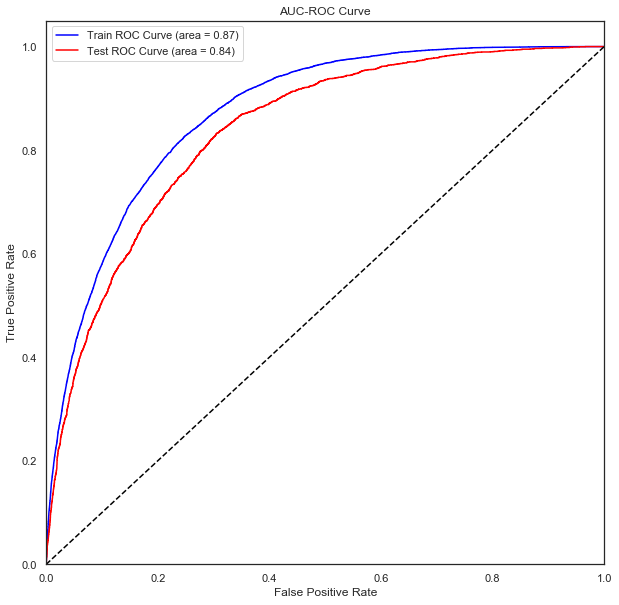

In [77]:
# We can visualize these ROC curves with matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, y_probs_train)[0],roc_curve(y_train, y_probs_train)[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_probs_train))

plt.plot(roc_curve(y_val, y_probs_val)[0],roc_curve(y_val, y_probs_val)[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_val, y_probs_val))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Finally, by using LightGBM (with manual parameter tuning), we get the Train AUC as 0.87 and Validation AUC as 0.84.
#### The difference of Train and Validation accuracy is approximately 0.03 and we can say that the model is also fit-fine.

#### Hence, among the three chosen Gradient Boosted Decision Trees, LightGBM gives the best accuracy on AUC and that too with a difference of 0.03, which makes the model ‘fit-fine’. 

#### However, both XGBoost and CatBoost have lower train-test accuracy difference and are fit-fine, we decided to choose LightGBM as it has highest AUC.

### Exporting data to csv file

In [78]:
# Reading in test data file
lab_test_df = pd.read_csv('PYTHON_LAB_DF_TEST_2.csv', sep = ",")
python_lab_test_df = lab_test_df.copy()

In [79]:
# Label Encoding
le = preprocessing.LabelEncoder()
le.fit(python_lab_test_df['SCHED_SURG_AREA'])
python_lab_test_df['SCHED_SURG_AREA'] = le.transform(python_lab_test_df['SCHED_SURG_AREA'])
python_lab_test_df['RACE'] = le.fit_transform(python_lab_test_df['RACE'].apply(str))
python_lab_test_df['ETHNIC_GROUP'] = le.fit_transform(python_lab_test_df['ETHNIC_GROUP'].apply(str))
python_lab_test_df['SCHED_HOSPITAL'] = le.fit_transform(python_lab_test_df['SCHED_HOSPITAL'].apply(str))
python_lab_test_df['SCHED_SURG_PROC_CD'] = le.fit_transform(python_lab_test_df['SCHED_SURG_PROC_CD'].apply(str))
python_lab_test_df['FEMALE'] = le.fit_transform(python_lab_test_df['FEMALE'].apply(str))
python_lab_test_df['CAV_REC_SEX'] = le.fit_transform(python_lab_test_df['CAV_REC_SEX'].apply(str))
python_lab_test_df['CAV_REC_LANG'] = le.fit_transform(python_lab_test_df['CAV_REC_LANG'].apply(str))
python_lab_test_df['CAV_REC_IPOP'] = le.fit_transform(python_lab_test_df['CAV_REC_IPOP'].apply(str))
python_lab_test_df['CAV_REC_PRIORITY_CODE'] = le.fit_transform(python_lab_test_df['CAV_REC_PRIORITY_CODE'].apply(str))
python_lab_test_df['CAV_REC_DISP_CODE'] = le.fit_transform(python_lab_test_df['CAV_REC_DISP_CODE'].apply(str))

In [80]:
python_lab_test_df = python_lab_test_df.drop(columns = ['PROC_DATE', 'CREATE_DT_TM', 'SCHED_START_DT_TM'])

In [81]:
predict_lab_test = gbm_rh.predict(python_lab_test_df.drop(columns = ['ID1']))

In [82]:
predict_lab_test

array([0.7274571 , 0.68008264, 0.79247017, ..., 0.74397117, 0.84123845,
       0.38515668])

In [83]:
predict_lab_test_df = python_lab_test_df[['ID1']].copy()
predict_lab_test_df['LOS_PROB'] = predict_lab_test

In [84]:
predict_lab_test_df.head()

ID1  LOS_PROB
0    1  0.727457
1    2  0.680083
2    3  0.792470
3    4  0.180654
4    5  0.131683

In [85]:
# Deploying to a csv file.
predict_lab_test_df.to_csv("PYTHON_LAB_TEST_PROBABILITY.csv", sep=',', index=False)

### Checking variable/feature importance

In [86]:
# Importing SHAP and LIME
import shap
import lime

In [87]:
import lime.lime_tabular

In [88]:
gbm_features = list(x_train.columns)

In [89]:
print(gbm_features)

['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'SCHED_SURG_PROC_CD', 'FEMALE', 'AGE_ON_CONTACT_DATE', 'BMI', 'WEIGHT', 'BP_SYSTOLIC', 'BP_DIASTOLIC', 'PULSE', 'PCPVISIT', 'METFORMIN_FLAG', 'OPIOIDS_FLAG', 'ALPHA_BLOCKERS', 'CENTRAL_ANTAGONISTS', 'RENIN', 'BETA_BLOCKERS', 'ACE_INHIB', 'ARB', 'ALDOSTERONE_BLOCKERS', 'VASODIALATORS', 'DIURETICS', 'CALCIUM_BLOCKERS', 'STATINS', 'INSULIN_MEDS', 'ASPIRIN', 'WARFARIN', 'DOACS', 'PRETERM_17P', 'MEDROL', 'PREDNISONE', 'INHALED_STEROID_WITH_LABA', 'INHALED_STEROID_WITHOUT_LABA', 'INHALED_STEROIDS', 'ASTHMA_BIOLOGICS', 'SHORT_ACTING_BRONCHO_DIALATORS', 'TNF_INHIBITORS', 'IMMUNOMODULATORS', 'AMINOSALICYLATES', 'CORTICOSTEROIDS', 'ARNI', 'ALLOPURINOL', 'SEIZURE', 'MUSCLERELAXANT', 'DIGOXIN', 'INOTROPES', 'ANTI_ARRHYTHMIC', 'ANTIPLATELET', 'SULFONYLUREA', 'GLP_1_AGONIST', 'THIAZOLIDINEDIONE', 'SGLT2_INHIBITOR', 'DPP4_INHIBITOR', 'ALPHA_GLUCOSIDASE_INHIBITOR', 'AMYLINOMIMETIC', 'RAPID_ACTING_INSULIN', 'SHORT_ACTING_INSULIN', 'INTERMEDI

In [90]:
print(len(gbm_features))

288


In [91]:
# LIME does not take pandas dataframes as inputs.  So, we must change the dataframe (x_train) to an array
gbm_exp_lime = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names = x_train.columns.values.tolist(),
                                                     mode = 'classification') #, discretize_continuous=False

Invalid value encountered in percentile
invalid value encountered in true_divide
Degrees of freedom <= 0 for slice.


In [92]:
from lightgbm import LGBMClassifier
gbm_clf = lgb.LGBMClassifier(boosting_type = 'gbdt',
                             num_leaves = 201,
                             #max_depth = ,
                             learning_rate = 0.04
                             #n_estimators = 
                             #,subsample_for_bin =
                             ,objective = 'binary'
                             ,metric = 'auc'
                             #,class_weight = 
                             #,min_split_gain =
                             #,min_split_weight =
                             ,min_child_weight = 700
                             #,min_child_samples =
                             ,subsample = 0.65
                             #,subsample_freq =
                             #,colsample_bytree =
                             ,reg_alpha = 73
                             ,reg_lambda = 958
                             ,importance_type = 'split' #will rank features by # of times it is used in model.'gain' for gain
                             ,num_iterations = 1557
                       )

In [93]:
# LIME cannot handle NaN values
#gbm_exp_i = gbm_exp_lime.explain_instance(x_test.values[100], gbm_clf.predict_proba, num_features = 288)

### SHAP

<b>“SHAP (SHapley Additive exPlanations) is used to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the “payout” (= the prediction) among the features.”</b>

In [94]:
xgb_shap_explainer = shap.TreeExplainer(gbm_rh)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [95]:
xgb_shap_vals_train = xgb_shap_explainer.shap_values(x_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


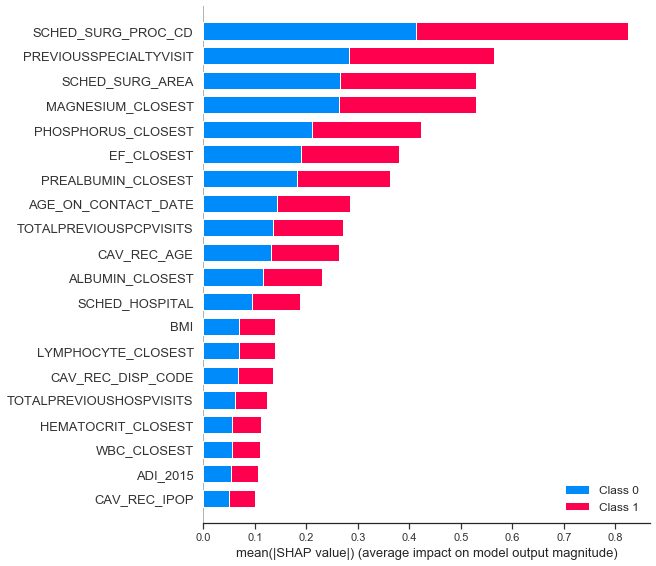

In [96]:
shap.summary_plot(xgb_shap_vals_train, x_train)

In [95]:
xgb_shap_vals_train = np.array(xgb_shap_vals_train)

In [96]:
shap.initjs()
shap.force_plot(xgb_shap_explainer.expected_value[0], xgb_shap_vals_train[0][0,:], x_train.iloc[0,:])

In [97]:
shap.force_plot(xgb_shap_explainer.expected_value[1], xgb_shap_vals_train[1][:500,:], x_train.iloc[:500,:])

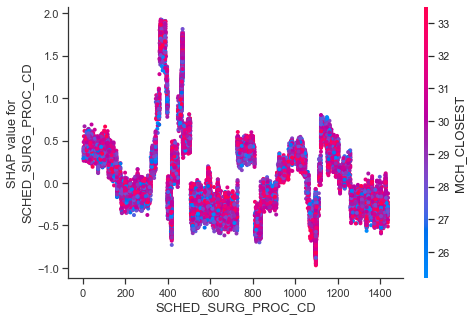

In [99]:
shap.dependence_plot("SCHED_SURG_PROC_CD", xgb_shap_vals_train[1], x_train, display_features=x_train)